In [ ]:
import numpy as np
np.set_printoptions(threshold=10) # printing setup
import matplotlib.pyplot as plt

In [ ]:
# This formula shall be imitated by the neural network
def formula_1(x):
    return x + 0.75

# This formula shall be imitated by the neural network, too
def formula_2(x):
    return(np.sin(x) + 0.5)

In [ ]:
# Input data
X = np.random.uniform(low=-0.5, high=1.55, size=100)# make 100 uniformly distributed samples
X = X.reshape(-1, 1) # -1 indicates "as many rows as required"
X # input data as column vector
X.shape

(100, 1)

In [ ]:
# Target values with formula_1
y_1 = np.array([formula_1(x) for x in X.flatten()]) # one output per sample, |X|-many samples
y_1 = y_1.reshape(-1, 1)
y_1 # target data as column vector

array([[1.39234571],
       [0.91697215],
       [1.37688512],
       ...,
       [0.83539411],
       [1.90544327],
       [0.55344531]])

In [ ]:
# Target values with formula_2
y_2 = np.array([formula_2(x) for x in X.flatten()]) # one output per sample, |X|-many samples
y_2 = y_2.reshape(-1, 1)
y_2 # target data as column vector

array([[1.09907528],
       [0.66619738],
       [1.08662499],
       ...,
       [0.58529036],
       [1.41497391],
       [0.30470847]])

### Code below contains the required modules

Imitation of formula 'x+0.75'
Weight_1:1.4796610042891594
Weight_2:1.376001118075758
Bias:0.023116900279180792


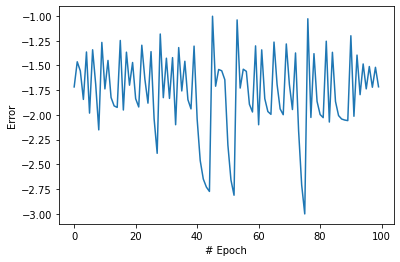

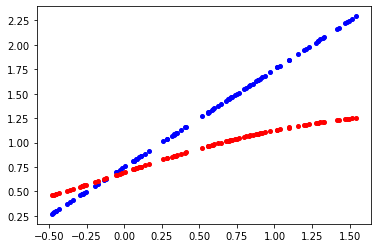


Imitation of formula 'sin(x)+0.5'
Weight_1:1.7112627520465427
Weight_2:1.010053022016372
Bias:-0.25594915770951837


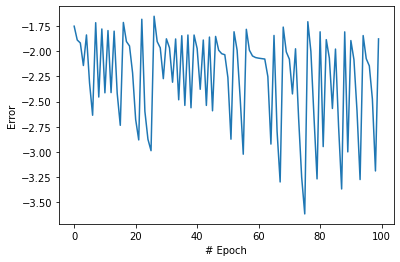

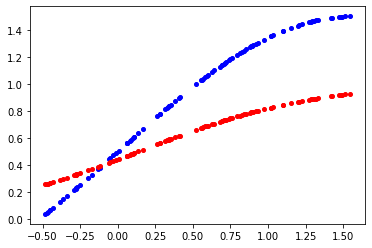

In [ ]:
# Simple neural-network based regressor
class NeuralNetwork:
    
    # Function called at object initialization
    def __init__(self):
        
        # These are members of the class. You can access them in every method by "self.var_name" and from outside the class with "instance_name.var_name"
        
        # Sample to compute pass with
        self.X          = 0 # set me!  set using random values from modules above
        self.y          = 0 # set me!  target of the network
        
        # Parameters to be learned
        self.weight_1   = 1.0 # teach me!
        self.weight_2   = 1.0 # teach me!
        self.bias       = 1.0 # teach me!
        
        # State information
        self.hidden     = 0.0 # use me!
        self.output     = 0.0 # use me!   predicted output
        self.error      = 0.0 # use me!
        
    # Set sample to be used in feed-forward and back-propagation pass
    def set_sample(self, X, y):
        self.X = float(X)
        self.y = float(y)
        
    # (a) Feed-forward pass
    def feed_forward(self):
        
        hidden_temp = self.X*self.weight_1+self.bias
        self.hidden = 1/(1 + np.exp(-hidden_temp))
        self.output = self.hidden*self.weight_2   
        self.error = 0.5*((self.y-self.output)*(self.y-self.output))

        # TODO: Feed-forward pass and error estimation, store results in state information members
        # print("TODO (a)") # remove this line, just here to produce no compile error in initial setup
      
    # (b) Back-propagation pass
    def back_prop(self):
        
                             
        '''
            Tip: get derivatives of all parameters with respect 
                 to the error being computed
        '''
        ## calculate error
        #self.error = 0.5 * (self.y - self.output)**2
                             
        derr_dout =  (self.output - self.y )            
        dout_dw2 = self.hidden
        dout_dhid = self.weight_2
        dhid_dhidunactive = self.hidden * (1 - self.hidden)
        derr_dw2 = derr_dout * dout_dw2

        dhidunactive_dw1 = self.X
        dhidunactive_dbias = 1.0
        derr_dbias = derr_dout * dout_dw2 * dhid_dhidunactive * dhidunactive_dbias
        derr_dw1 = derr_dout * dout_dhid* dhid_dhidunactive * dhidunactive_dw1
        
        
        self.weight_1 -= 0.01 * derr_dw1
        self.weight_2 -= 0.01 * derr_dw2
        self.bias -= 0.01 * derr_dbias 
        
        
def execute_nn(X, y):
    
    # Instantiate neural network
    nn = NeuralNetwork()
    
    shuffleData=[X,y] #to facilitate shuffling of data
    #print("printing shuffleData : ",shuffleData)
    # Collect mean error of each epoch to plot it later
    epoch_error = []

    # Perform multiple epochs, aka inputting the dataset multiple times
    for epoch in range(0,100):

       # Remember final error of each epoch in "epoch_error"  
        ep_error = 0.0
        np.random.shuffle(shuffleData)   #shuffling the Data
        for i in range(len(X)):
            nn.set_sample(shuffleData[0][i], shuffleData[1][i])
            nn.feed_forward()
            nn.back_prop()
            ep_error += nn.error
            
        epoch_error.append(ep_error/len(X))

    #Print final parameters of trained neural network
    print("Weight_1:"+ str(nn.weight_1))
    print("Weight_2:" + str(nn.weight_2))
    print("Bias:" + str(nn.bias))
    
    # Plot epoch errors with logarithmic transformation
    plt.plot(list(range(len(epoch_error))), np.log(epoch_error))
    ax = plt.gca()
    ax.set_xlabel('# Epoch')
    ax.set_ylabel('Error')
    plt.show()
    
    # Plot datapoints as originally transformed and as transformed by neural network
    computed = []
    for i in range(0, X.shape[0]):
        nn.set_sample(X[i], y[i])
        nn.feed_forward()
        computed.append(nn.output)
    plt.scatter(X.transpose().flatten(), y.transpose().flatten(), c='blue', s=16)
    plt.scatter(X.transpose().flatten(), computed, c='red', s=16)
    plt.show()

print("Imitation of formula 'x+0.75'")
execute_nn(X,y_1)
print()
print("Imitation of formula 'sin(x)+0.5'")
execute_nn(X,y_2)